In [10]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "NaNumGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [4]:
df_raw1=pd.read_csv("./on_items.csv", encoding="cp949")
df_raw1

,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
0,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2021,15840,16130
1,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2022,17030,17340
2,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2023,17380,18640
3,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2022,14160,15350
4,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2023,15060,16160
...,...,...,...,...,...,...,...,...,...,...,...
10049,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L,2022,7180,7790
10050,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L,2021,6820,7320
10051,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수,2023,15890,17050
10052,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수,2022,14780,16370


In [74]:
df_raw1[df_raw1['ItemCode']=="L4-M17-S0530-1024"]

,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
8162,L4,신선식품,M17,수산,S0530,전복,L4-M17-S0530-1024,완도 활전복 1kg 중 22-25미,2023,37540,40260
8163,L4,신선식품,M17,수산,S0530,전복,L4-M17-S0530-1024,완도 활전복 1kg 중 22-25미,2022,35660,39860
8164,L4,신선식품,M17,수산,S0530,전복,L4-M17-S0530-1024,완도 활전복 1kg 중 22-25미,2021,33160,37070


In [11]:
df_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054 entries, 0 to 10053
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ItemLargeCode   10054 non-null  object
 1   ItemLargeName   10054 non-null  object
 2   ItemMiddleCode  10054 non-null  object
 3   ItemMiddleName  10054 non-null  object
 4   ItemSmallCode   10054 non-null  object
 5   ItemSmallName   10054 non-null  object
 6   ItemCode        10054 non-null  object
 7   ItemName        10054 non-null  object
 8   PriceYear       10054 non-null  int64 
 9   PriceMin        10054 non-null  int64 
 10  PriceMax        10054 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 864.1+ KB


In [12]:
df_raw1.isnull().sum()

ItemLargeCode     0
ItemLargeName     0
ItemMiddleCode    0
ItemMiddleName    0
ItemSmallCode     0
ItemSmallName     0
ItemCode          0
ItemName          0
PriceYear         0
PriceMin          0
PriceMax          0
dtype: int64

In [14]:
for i in df_raw1.columns:
    print(df_raw1[i].value_counts())

L1    6804
L4    2705
L5     415
L3     130
Name: ItemLargeCode, dtype: int64
가공식품    6804
신선식품    2705
음료       415
생수       130
Name: ItemLargeName, dtype: int64
M17    2067
M12    1395
M11    1182
M22    1124
M15     996
M19     618
M23     564
M21     563
M24     490
M13     296
M20     280
M18     214
M25     135
M16     130
Name: ItemMiddleCode, dtype: int64
수산    2067
과일    1395
곡물    1182
채소    1124
냉동     996
양념     618
축산     564
즉석     563
커피     490
과자     296
음료     280
신선     214
탄산     135
생수     130
Name: ItemMiddleName, dtype: int64
S0140    996
S0540    563
S0600    490
S0100    460
S0350    329
S0380    327
S0220    306
S0070    302
S0440    296
S0720    280
S0520    271
S0020    270
S0030    266
S0260    254
S0640    249
S0340    222
S0580    218
S0110    214
S0280    205
S0360    162
S0700    158
S0230    157
S0590    149
S0650    148
S0420    148
S0630    135
S0250    131
S0390    130
S0620    127
S0080    122
S0190    122
S0130    116
S0200    112
S0670    112
S0

<Axes: xlabel='ItemLargeName', ylabel='count'>

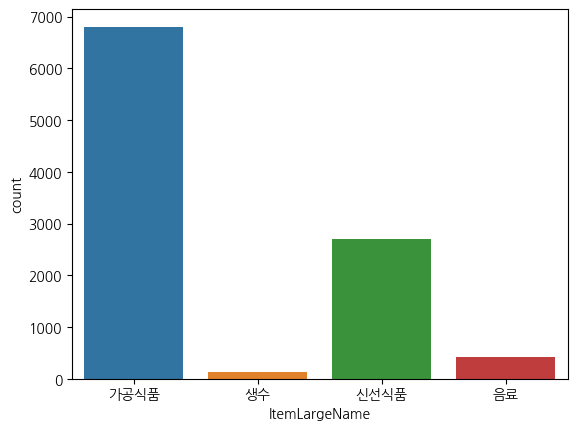

In [25]:
# 연령대 Bar Chart
sns.countplot(x="ItemLargeName", data=df_raw1)

<Axes: xlabel='ItemSmallName', ylabel='count'>

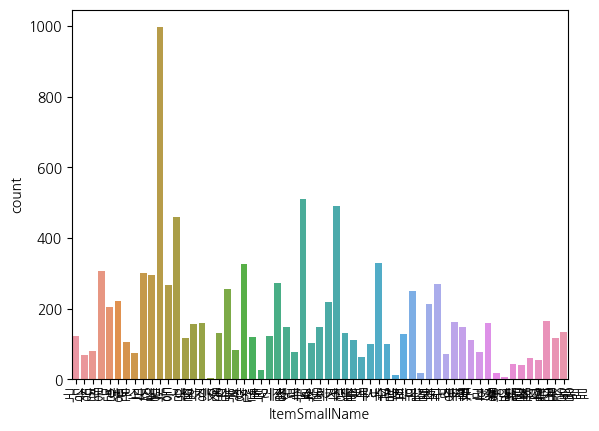

In [26]:
# 연령대 Bar Chart
sns.countplot(x="ItemSmallName", data=df_raw1)

In [17]:
df_raw2=pd.read_csv("./on_orders.csv", encoding="cp949")
df_raw2

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
0,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M17-S0530-1024,33310,08JAN2021:06:24:00
1,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M21-S0540-1082,3780,08JAN2021:06:24:00
2,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M15-S0140-1311,22520,08JAN2021:06:24:00
3,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M12-S0350-1035,21630,08JAN2021:06:24:00
4,U10001,U10001-O2021-1003,14JAN21:16:50:14,L4-M12-S0640-1057,11700,15JAN2021:06:28:00
...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,28DEC23:14:06:13,L4-M12-S0350-1063,11520,29DEC2023:04:23:00
856619,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00
856620,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00
856621,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00


In [73]:
df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

idUser
U10001    [L4-M17-S0530-1024, L1-M21-S0540-1082, L1-M15-...
U10002    [L4-M22-S0650-1007, L1-M17-S0100-1146, L1-M13-...
U10003    [L4-M22-S0020-1062, L3-M16-S0390-1043, L1-M24-...
U10004    [L4-M12-S0350-1037, L1-M12-S0330-1020, L1-M13-...
U10005    [L4-M23-S0930-1007, L1-M23-S0580-1083, L1-M11-...
                                ...                        
U12996    [L4-M18-S0110-1058, L4-M12-S0640-1012, L4-M12-...
U12997    [L4-M22-S0360-1011, L4-M17-S0530-1020, L4-M17-...
U12998    [L4-M22-S0860-1001, L4-M22-S0650-1055, L4-M17-...
U12999    [L4-M23-S0910-1006, L4-M22-S0650-1003, L4-M18-...
U13000    [L4-M22-S0700-1023, L4-M22-S0020-1015, L4-M18-...
Name: ItemCode, Length: 3000, dtype: object

In [80]:
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)


# 아이템 코드 리스트를 아이템 이름 리스트로 변환하기 위한 함수
def map_item_codes_to_names(item_codes):
    # df_items와 병합해서 ItemCode에 대응하는 ItemName을 가져오기
    return df_raw1[df_raw1['ItemCode'].isin(item_codes)]['ItemName'].drop_duplicates().tolist()

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)

idUser
U10001    [CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg, 오뚜기 옛날 자른당면...
U10002    [CJ 제일제면소중면 900G 국수  단일 수량, CJ백설 제일제면소(소면)900g...
U10003    [방울이 구포국수 쫄깃1.5kg 10개 국수, 생면쟁이 생 소면 콩국수 잔치국수, ...
U10004    [NS56B 농심 신라면 큰사발면 114g 16입, 농심 신라면 120g 5입 X ...
U10005    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 오뚜기 옛날국수 소면 500g ...
                                ...                        
U12996    [치자소면국수(신갈산 3k), 오뚜기 옛날국수 소면 500g X 24, 오뚜기 옛날...
U12997    [명품 구포국수 3개입 선물세트, 옛날국수소면900g 오뚜기 x 4ea, 짜글짜글 ...
U12998    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 우리농산물 볶음땅콩 400g, ...
U12999    [오뚜기 옛날국수소면3kg, 춘천막국수 513g, 고창 대성농협 고소한 생알 땅콩 ...
U13000    [(1900370) 컵라면 쌀국수 1박스/6컵, (2001350) 컵라면 치즈 불닭...
Name: ItemCode, Length: 3000, dtype: object


In [87]:
def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 중복 제거하지 않고 아이템 이름 매핑
    item_names = df_raw1[df_raw1['ItemCode'].isin(item_codes)]['ItemName']
    
    # 중복된 아이템 이름을 모두 반영하여 리스트로 반환
    return item_names.tolist()

In [88]:
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)

idUser
U10001    [CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg, CJ프레시웨이 이츠웰...
U10002    [CJ 제일제면소중면 900G 국수  단일 수량, CJ 제일제면소중면 900G 국수...
U10003    [방울이 구포국수 쫄깃1.5kg 10개 국수, 방울이 구포국수 쫄깃1.5kg 10개...
U10004    [NS56B 농심 신라면 큰사발면 114g 16입, NS56B 농심 신라면 큰사발면...
U10005    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, CJ제일제당 풍국면 들기름 막국...
                                ...                        
U12996    [치자소면국수(신갈산 3k), 치자소면국수(신갈산 3k), 치자소면국수(신갈산 3k...
U12997    [명품 구포국수 3개입 선물세트, 명품 구포국수 3개입 선물세트, 명품 구포국수 3...
U12998    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, CJ제일제당 풍국면 들기름 막국...
U12999    [오뚜기 옛날국수소면3kg, 오뚜기 옛날국수소면3kg, 오뚜기 옛날국수소면3kg, ...
U13000    [(1900370) 컵라면 쌀국수 1박스/6컵, (1900370) 컵라면 쌀국수 1...
Name: ItemCode, Length: 3000, dtype: object


In [76]:
check=map_item_codes_to_names(["L4-M17-S0530-1024"])
print(check)

['완도 활전복 1kg 중 22-25미', '완도 활전복 1kg 중 22-25미', '완도 활전복 1kg 중 22-25미']


In [92]:
def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    item_names = df_raw1[df_raw1['ItemCode'].isin(item_codes)]['ItemName']
    
   # 중복된 아이템 이름을 모두 반영하여 리스트로 반환
    return item_names.tolist()

item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)


idUser
U10001    [CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg, CJ프레시웨이 이츠웰...
U10002    [CJ 제일제면소중면 900G 국수  단일 수량, CJ 제일제면소중면 900G 국수...
U10003    [방울이 구포국수 쫄깃1.5kg 10개 국수, 방울이 구포국수 쫄깃1.5kg 10개...
U10004    [NS56B 농심 신라면 큰사발면 114g 16입, NS56B 농심 신라면 큰사발면...
U10005    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, CJ제일제당 풍국면 들기름 막국...
                                ...                        
U12996    [치자소면국수(신갈산 3k), 치자소면국수(신갈산 3k), 치자소면국수(신갈산 3k...
U12997    [명품 구포국수 3개입 선물세트, 명품 구포국수 3개입 선물세트, 명품 구포국수 3...
U12998    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, CJ제일제당 풍국면 들기름 막국...
U12999    [오뚜기 옛날국수소면3kg, 오뚜기 옛날국수소면3kg, 오뚜기 옛날국수소면3kg, ...
U13000    [(1900370) 컵라면 쌀국수 1박스/6컵, (1900370) 컵라면 쌀국수 1...
Name: ItemCode, Length: 3000, dtype: object


In [94]:
def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    item_names = df_raw1[df_raw1['ItemCode'].isin(item_codes)]['ItemName']
    
    # 중복된 아이템 이름을 제거하고 첫 번째 아이템 이름만 선택
    # 여기서는 'ItemCode'에 대한 중복을 제거하고 첫 번째 이름만 선택합니다.
    item_names = item_names.drop_duplicates().tolist()  # 중복 제거 후 리스트로 변환
    
    return item_names

# 아이템 코드 리스트를 유저별로 그룹화
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)

idUser
U10001    [CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg, 오뚜기 옛날 자른당면...
U10002    [CJ 제일제면소중면 900G 국수  단일 수량, CJ백설 제일제면소(소면)900g...
U10003    [방울이 구포국수 쫄깃1.5kg 10개 국수, 생면쟁이 생 소면 콩국수 잔치국수, ...
U10004    [NS56B 농심 신라면 큰사발면 114g 16입, 농심 신라면 120g 5입 X ...
U10005    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 오뚜기 옛날국수 소면 500g ...
                                ...                        
U12996    [치자소면국수(신갈산 3k), 오뚜기 옛날국수 소면 500g X 24, 오뚜기 옛날...
U12997    [명품 구포국수 3개입 선물세트, 옛날국수소면900g 오뚜기 x 4ea, 짜글짜글 ...
U12998    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 우리농산물 볶음땅콩 400g, ...
U12999    [오뚜기 옛날국수소면3kg, 춘천막국수 513g, 고창 대성농협 고소한 생알 땅콩 ...
U13000    [(1900370) 컵라면 쌀국수 1박스/6컵, (2001350) 컵라면 치즈 불닭...
Name: ItemCode, Length: 3000, dtype: object


In [97]:
def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    item_names = df_raw1[df_raw1['ItemCode'].isin(item_codes)]['ItemName']
    
    # 만약 아이템 코드에 해당하는 아이템 이름이 없다면 빈 리스트로 반환
    if item_names.empty:
        return []
    
    # 중복된 아이템 이름을 제거하고 첫 번째 아이템 이름만 선택
    item_names = item_names.drop_duplicates().tolist()  # 중복 제거 후 리스트로 변환
    
    return item_names

# 아이템 코드 리스트를 유저별로 그룹화
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)

# 예시로 첫 번째 유저의 아이템 이름 리스트 길이 확인
print(len(item_name_list_per_user[0]))

# 유저별 주문 건수 확인
print(df_raw2[df_raw2['idUser'] == "U10001"]['ItemCode'].count())

idUser
U10001    [CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg, 오뚜기 옛날 자른당면...
U10002    [CJ 제일제면소중면 900G 국수  단일 수량, CJ백설 제일제면소(소면)900g...
U10003    [방울이 구포국수 쫄깃1.5kg 10개 국수, 생면쟁이 생 소면 콩국수 잔치국수, ...
U10004    [NS56B 농심 신라면 큰사발면 114g 16입, 농심 신라면 120g 5입 X ...
U10005    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 오뚜기 옛날국수 소면 500g ...
                                ...                        
U12996    [치자소면국수(신갈산 3k), 오뚜기 옛날국수 소면 500g X 24, 오뚜기 옛날...
U12997    [명품 구포국수 3개입 선물세트, 옛날국수소면900g 오뚜기 x 4ea, 짜글짜글 ...
U12998    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 우리농산물 볶음땅콩 400g, ...
U12999    [오뚜기 옛날국수소면3kg, 춘천막국수 513g, 고창 대성농협 고소한 생알 땅콩 ...
U13000    [(1900370) 컵라면 쌀국수 1박스/6컵, (2001350) 컵라면 치즈 불닭...
Name: ItemCode, Length: 3000, dtype: object
326
347


In [98]:
def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    # 아이템 코드에 해당하는 이름을 가져오되, 중복된 아이템 이름은 제거하고 하나만 선택
    item_names = df_raw1[df_raw1['ItemCode'].isin(item_codes)]['ItemName']
    
    # 중복된 아이템 이름을 제거하고 고유한 이름만 반환
    item_names = item_names.drop_duplicates().tolist()  # 중복 제거 후 리스트로 변환
    
    return item_names

# 아이템 코드 리스트를 유저별로 그룹화
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)

# 예시로 첫 번째 유저의 아이템 이름 리스트 길이 확인
print(len(item_name_list_per_user[0]))

# 유저별 주문 건수 확인
print(df_raw2[df_raw2['idUser'] == "U10001"]['ItemCode'].count())

idUser
U10001    [CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg, 오뚜기 옛날 자른당면...
U10002    [CJ 제일제면소중면 900G 국수  단일 수량, CJ백설 제일제면소(소면)900g...
U10003    [방울이 구포국수 쫄깃1.5kg 10개 국수, 생면쟁이 생 소면 콩국수 잔치국수, ...
U10004    [NS56B 농심 신라면 큰사발면 114g 16입, 농심 신라면 120g 5입 X ...
U10005    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 오뚜기 옛날국수 소면 500g ...
                                ...                        
U12996    [치자소면국수(신갈산 3k), 오뚜기 옛날국수 소면 500g X 24, 오뚜기 옛날...
U12997    [명품 구포국수 3개입 선물세트, 옛날국수소면900g 오뚜기 x 4ea, 짜글짜글 ...
U12998    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 우리농산물 볶음땅콩 400g, ...
U12999    [오뚜기 옛날국수소면3kg, 춘천막국수 513g, 고창 대성농협 고소한 생알 땅콩 ...
U13000    [(1900370) 컵라면 쌀국수 1박스/6컵, (2001350) 컵라면 치즈 불닭...
Name: ItemCode, Length: 3000, dtype: object
326
347


In [99]:
mapping_df=df_raw1[['ItemCode','ItemName']]

In [101]:
mapping_df.set_index('ItemCode')

,ItemName
ItemCode,
L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입
L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입
L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입
L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
...,...
L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L
L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L
L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수


In [103]:
# 아이템 코드와 아이템 이름 매핑 DataFrame
mapping_df = df_raw1[['ItemCode', 'ItemName']]

# 아이템 코드별로 그룹화 후, 첫 번째 아이템 이름만 선택
item_name_mapping = mapping_df.groupby('ItemCode')['ItemName'].first()

# 결과 확인
print(item_name_mapping)

ItemCode
L1-M11-S0080-1001                    (식품)샘표 김치국수 101g 10입
L1-M11-S0080-1002          2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
L1-M11-S0080-1003                  500G 오뚜기 옛날 국수소면 x 12개
L1-M11-S0080-1004               CJ 제일제면소중면 900G 국수  단일 수량
L1-M11-S0080-1005    CJ백설 제일제면소 소면 900g 국수 소면 소바 칼국수 스파게티
                                     ...                 
L5-M25-S0630-1050                              펩시 콜라 1.8L
L5-M25-S0630-1051               펩시 콜라 제로 슈거 라임향 음료 스포츠 탄산
L5-M25-S0630-1052                  펩시콜라 1.5L 12개 캔음료 탄산음료
L5-M25-S0630-1053                       한국 탄산음료 코카콜라 1.5L
L5-M25-S0630-1054           환타 오렌지 190ml x 30캔 / 탄산음료 음료수
Name: ItemName, Length: 3990, dtype: object


In [106]:
def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    item_names = item_name_mapping['ItemCode'].isin(item_codes)['ItemName']
    
    # 중복된 아이템 이름을 제거하고 첫 번째 아이템 이름만 선택
    # 여기서는 'ItemCode'에 대한 중복을 제거하고 첫 번째 이름만 선택합니다.
    item_names = item_names.tolist()  # 중복 제거 후 리스트로 변환
    
    return item_names

# 아이템 코드 리스트를 유저별로 그룹화
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)

KeyError: 'ItemCode'

In [107]:
# 아이템 코드와 아이템 이름 매핑 DataFrame
mapping_df = df_raw1[['ItemCode', 'ItemName']]

# 아이템 코드별로 그룹화 후, 첫 번째 아이템 이름만 선택
item_name_mapping = mapping_df.groupby('ItemCode')['ItemName'].first()

# 결과 확인
print(item_name_mapping)


def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    # item_codes가 아이템 코드 리스트로 주어지면, item_name_mapping에서 해당 코드들의 아이템 이름을 추출합니다.
    item_names = item_name_mapping[item_name_mapping.index.isin(item_codes)]
    
    # 아이템 이름 리스트로 변환
    item_names = item_names.tolist()  # 중복 제거 후 리스트로 변환
    
    return item_names

# 아이템 코드 리스트를 유저별로 그룹화
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)

ItemCode
L1-M11-S0080-1001                    (식품)샘표 김치국수 101g 10입
L1-M11-S0080-1002          2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
L1-M11-S0080-1003                  500G 오뚜기 옛날 국수소면 x 12개
L1-M11-S0080-1004               CJ 제일제면소중면 900G 국수  단일 수량
L1-M11-S0080-1005    CJ백설 제일제면소 소면 900g 국수 소면 소바 칼국수 스파게티
                                     ...                 
L5-M25-S0630-1050                              펩시 콜라 1.8L
L5-M25-S0630-1051               펩시 콜라 제로 슈거 라임향 음료 스포츠 탄산
L5-M25-S0630-1052                  펩시콜라 1.5L 12개 캔음료 탄산음료
L5-M25-S0630-1053                       한국 탄산음료 코카콜라 1.5L
L5-M25-S0630-1054           환타 오렌지 190ml x 30캔 / 탄산음료 음료수
Name: ItemName, Length: 3990, dtype: object
idUser
U10001    [CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg, 오뚜기 옛날 자른당면...
U10002    [CJ 제일제면소중면 900G 국수  단일 수량, CJ백설 제일제면소(소면)900g...
U10003    [방울이 구포국수 쫄깃1.5kg 10개 국수, 생면쟁이 생 소면 콩국수 잔치국수, ...
U10004    [NS56B 농심 신라면 큰사발면 114g 16입, 농심 신라면 120g 5입 X ...
U10005    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 오뚜기 옛날국수 소면 500g ...
  

In [116]:
# 아이템 코드와 아이템 이름 매핑 DataFrame
mapping_df = df_raw1[['ItemCode', 'ItemName']]

# 아이템 코드별로 모든 아이템 이름을 리스트로 반환
item_name_mapping = mapping_df.groupby('ItemCode')['ItemName'].first()
print(item_name_mapping)

def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    item_names = item_name_mapping[item_name_mapping.index.isin(item_codes)]
    
    # 아이템 이름 리스트로 변환 (중복을 제거하지 않고 포함)
    item_names = item_names.tolist()  # 중복 제거하지 않고 리스트 변환
    
    return item_names

# 아이템 코드 리스트를 유저별로 그룹화
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)

ItemCode
L1-M11-S0080-1001                    (식품)샘표 김치국수 101g 10입
L1-M11-S0080-1002          2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
L1-M11-S0080-1003                  500G 오뚜기 옛날 국수소면 x 12개
L1-M11-S0080-1004               CJ 제일제면소중면 900G 국수  단일 수량
L1-M11-S0080-1005    CJ백설 제일제면소 소면 900g 국수 소면 소바 칼국수 스파게티
                                     ...                 
L5-M25-S0630-1050                              펩시 콜라 1.8L
L5-M25-S0630-1051               펩시 콜라 제로 슈거 라임향 음료 스포츠 탄산
L5-M25-S0630-1052                  펩시콜라 1.5L 12개 캔음료 탄산음료
L5-M25-S0630-1053                       한국 탄산음료 코카콜라 1.5L
L5-M25-S0630-1054           환타 오렌지 190ml x 30캔 / 탄산음료 음료수
Name: ItemName, Length: 3990, dtype: object
idUser
U10001    [CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg, 오뚜기 옛날 자른당면...
U10002    [CJ 제일제면소중면 900G 국수  단일 수량, CJ백설 제일제면소(소면)900g...
U10003    [방울이 구포국수 쫄깃1.5kg 10개 국수, 생면쟁이 생 소면 콩국수 잔치국수, ...
U10004    [NS56B 농심 신라면 큰사발면 114g 16입, 농심 신라면 120g 5입 X ...
U10005    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 오뚜기 옛날국수 소면 500g ...
  

In [118]:
len(item_name_list_per_user[0])

326

In [ ]:
# 아이템 코드와 아이템 이름 매핑 DataFrame
mapping_df = df_raw1[['ItemCode', 'ItemName']]

# 아이템 코드별로 모든 아이템 이름을 리스트로 반환
item_name_mapping = mapping_df.groupby('ItemCode')['ItemName'].apply(list)

# 결과 확인
print(item_name_mapping)

def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    item_names = item_name_mapping[item_name_mapping.index.isin(item_codes)]
    
    # 아이템 이름 리스트로 변환 (중복을 제거하지 않고 포함)
    item_names = item_names.tolist()  # 중복 제거하지 않고 리스트 변환
    
    return item_names

# 아이템 코드 리스트를 유저별로 그룹화
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)

In [119]:
# 아이템 코드와 아이템 이름 매핑 DataFrame
mapping_df = df_raw1[['ItemCode', 'ItemName']]

# 결과 확인
print(item_name_mapping)

def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    item_names = item_name_mapping[item_name_mapping.index.isin(item_codes)]
    
    # 아이템 이름 리스트로 변환 (중복을 제거하지 않고 포함)
    item_names = item_names.tolist()  # 중복 제거하지 않고 리스트 변환
    
    return item_names


# 아이템 코드 리스트를 유저별로 그룹화
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)

# 결과 확인
print(item_name_list_per_user)

ItemCode
L1-M11-S0080-1001                    (식품)샘표 김치국수 101g 10입
L1-M11-S0080-1002          2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
L1-M11-S0080-1003                  500G 오뚜기 옛날 국수소면 x 12개
L1-M11-S0080-1004               CJ 제일제면소중면 900G 국수  단일 수량
L1-M11-S0080-1005    CJ백설 제일제면소 소면 900g 국수 소면 소바 칼국수 스파게티
                                     ...                 
L5-M25-S0630-1050                              펩시 콜라 1.8L
L5-M25-S0630-1051               펩시 콜라 제로 슈거 라임향 음료 스포츠 탄산
L5-M25-S0630-1052                  펩시콜라 1.5L 12개 캔음료 탄산음료
L5-M25-S0630-1053                       한국 탄산음료 코카콜라 1.5L
L5-M25-S0630-1054           환타 오렌지 190ml x 30캔 / 탄산음료 음료수
Name: ItemName, Length: 3990, dtype: object
idUser
U10001    [CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg, 오뚜기 옛날 자른당면...
U10002    [CJ 제일제면소중면 900G 국수  단일 수량, CJ백설 제일제면소(소면)900g...
U10003    [방울이 구포국수 쫄깃1.5kg 10개 국수, 생면쟁이 생 소면 콩국수 잔치국수, ...
U10004    [NS56B 농심 신라면 큰사발면 114g 16입, 농심 신라면 120g 5입 X ...
U10005    [CJ제일제당 풍국면 들기름 막국수4팩 총 8인분, 오뚜기 옛날국수 소면 500g ...
  

In [127]:
mapping_df = df_raw1[['ItemCode', 'ItemName']]
mapping_df

,ItemCode,ItemName
0,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입
1,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입
2,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입
3,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
4,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
...,...,...
10049,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L
10050,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L
10051,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수
10052,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수


In [174]:
# 아이템 코드 리스트를 유저별로 그룹화
item_code_list_per_user = df_raw2.groupby(['idUser'])['ItemCode'].apply(list)
len(item_code_list_per_user[0])

347

In [133]:
def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    item_names =mapping_df[mapping_df['ItemCode'].isin(item_codes)]
    
    # 아이템 이름 리스트로 변환 (중복을 제거하지 않고 포함)
    item_names = item_names.tolist() # 중복 제거하지 않고 리스트 변환
    
    return item_names



In [134]:
# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = item_code_list_per_user.apply(map_item_codes_to_names)


# 결과 확인
print(item_name_list_per_user)

idUser
U10001                   ItemCode                       ...
U10002                   ItemCode                       ...
U10003                   ItemCode                       ...
U10004                   ItemCode                       ...
U10005                    ItemCode                      ...
                                ...                        
U12996                   ItemCode                       ...
U12997                    ItemCode                      ...
U12998                    ItemCode                      ...
U12999                   ItemCode                  ItemN...
U13000                    ItemCode                      ...
Name: ItemCode, Length: 3000, dtype: object


In [135]:
print(item_name_list_per_user[0])

               ItemCode                                     ItemName
126   L1-M11-S0160-1003             CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg
161   L1-M11-S0160-1020                          오뚜기 옛날 자른당면 500g 1개
170   L1-M11-S0160-1023           오뚜기 오뚜기 옛날당면500g 넓적당면 잡채 잡채당면 사리당면
310   L1-M11-S0220-1029  농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게
348   L1-M11-S0220-1025             농심 봉지라면 멀티팩 골라담기 / 농심 신라면 5개입 1팩
...                 ...                                          ...
9625  L4-M23-S0930-1016                                 차돌박이 150g 냉동
9690  L5-M20-S0720-1018                          게토레이 레몬  600ml  24개
9736  L5-M20-S0720-1037                        롯데 게토레이 레몬 600ml x20개
9762  L5-M20-S0720-1048                                 롯데칠성음료 잔치집식혜
9970  L5-M25-S0630-1016                             롯데칠성음료 펩시콜라 1.8L

[326 rows x 2 columns]


In [121]:
len(item_name_list_per_user[0])

326

In [228]:
mapping_df = df_raw1[['ItemCode', 'ItemName']]
mapping_df

,ItemCode,ItemName
0,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입
1,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입
2,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입
3,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
4,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
...,...,...
10049,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L
10050,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L
10051,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수
10052,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수


In [232]:
for i in mapping_df.columns:
    print(mapping_df[i].value_counts())

L1-M11-S0220-1030    5
L1-M11-S0220-1088    5
L5-M25-S0630-1006    5
L1-M17-S0230-1001    4
L1-M23-S0580-1015    3
                    ..
L1-M15-S0140-1126    1
L4-M22-S0360-1005    1
L3-M16-S0390-1019    1
L4-M22-S0360-1003    1
L4-M12-S0290-1014    1
Name: ItemCode, Length: 3990, dtype: int64
프리미엄 돌김 곱창김 재래김 구운김 조미김 김밥김 선물세트 1속 2속               6
농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g    5
오뚜기 진라면 순한맛 5개입                                      5
[펩시] 콜라 (1.8L/펫)                                     5
D단대전통시장 중앙상회 국산 남해안 마른멸치                             4
                                                    ..
[무농약] 풋고추 200g                                       1
한양식품 한양 꽃보다오징어 80g  x 3봉 - 먹을수록 땡기는 그맛               1
황태채 250g 실채 명태채 북어채                                  1
(냉동)사조남부햄 고기손만두1.4kg                                 1
고향만두950g/해태-3개                                       1
Name: ItemName, Length: 3989, dtype: int64


In [234]:
mapping_df['ItemCode']

0        L1-M11-S0080-1001
1        L1-M11-S0080-1001
2        L1-M11-S0080-1001
3        L1-M11-S0080-1002
4        L1-M11-S0080-1002
               ...        
10049    L5-M25-S0630-1053
10050    L5-M25-S0630-1053
10051    L5-M25-S0630-1054
10052    L5-M25-S0630-1054
10053    L5-M25-S0630-1054
Name: ItemCode, Length: 10054, dtype: object

In [236]:
mapping_df['ItemCode']
check=mapping_df['ItemName'].to_list()

In [238]:
duplicates = mapping_df[mapping_df.duplicated(subset='ItemCode', keep=False)]  # 아이템 코드가 중복되는 항목
print(duplicates)

                ItemCode                        ItemName
0      L1-M11-S0080-1001            (식품)샘표 김치국수 101g 10입
1      L1-M11-S0080-1001            (식품)샘표 김치국수 101g 10입
2      L1-M11-S0080-1001            (식품)샘표 김치국수 101g 10입
3      L1-M11-S0080-1002  2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
4      L1-M11-S0080-1002  2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
...                  ...                             ...
10049  L5-M25-S0630-1053               한국 탄산음료 코카콜라 1.5L
10050  L5-M25-S0630-1053               한국 탄산음료 코카콜라 1.5L
10051  L5-M25-S0630-1054   환타 오렌지 190ml x 30캔 / 탄산음료 음료수
10052  L5-M25-S0630-1054   환타 오렌지 190ml x 30캔 / 탄산음료 음료수
10053  L5-M25-S0630-1054   환타 오렌지 190ml x 30캔 / 탄산음료 음료수

[9712 rows x 2 columns]


In [239]:
# 아이템 코드에 대응되는 유일한 아이템 이름만 확인
unique_item_names = mapping_df.groupby('ItemCode')['ItemName'].nunique()
print(unique_item_names[unique_item_names > 1])

Series([], Name: ItemName, dtype: int64)


In [240]:
# 'ItemCode'별로 아이템 이름이 몇 개씩 있는지 확인
duplicates = mapping_df.groupby('ItemCode')['ItemName'].nunique()
print(duplicates[duplicates > 1])  

Series([], Name: ItemName, dtype: int64)


In [237]:
check

['(식품)샘표 김치국수 101g 10입',
 '(식품)샘표 김치국수 101g 10입',
 '(식품)샘표 김치국수 101g 10입',
 '2.1kg 6배 메밀 Bestco 희석용 소바 국수장국',
 '2.1kg 6배 메밀 Bestco 희석용 소바 국수장국',
 '500G 오뚜기 옛날 국수소면 x 12개',
 '500G 오뚜기 옛날 국수소면 x 12개',
 '500G 오뚜기 옛날 국수소면 x 12개',
 'CJ 제일제면소중면 900G 국수  단일 수량',
 'CJ 제일제면소중면 900G 국수  단일 수량',
 'CJ 제일제면소중면 900G 국수  단일 수량',
 'CJ백설 제일제면소 소면 900g 국수 소면 소바 칼국수 스파게티',
 'CJ백설 제일제면소 소면 900g 국수 소면 소바 칼국수 스파게티',
 'CJ백설 제일제면소 소면 900g 국수 소면 소바 칼국수 스파게티',
 'CJ백설 제일제면소칼국수900g 국수 소면 소바 칼국수 스파게티',
 'CJ백설 제일제면소칼국수900g 국수 소면 소바 칼국수 스파게티',
 'CJ백설 제일제면소칼국수900g 국수 소면 소바 칼국수 스파게티',
 'CJ제일제당 풍국면 들기름 막국수4팩 총 8인분',
 'CJ제일제당 풍국면 들기름 막국수4팩 총 8인분',
 'CJ제일제당 풍국면 들기름 막국수4팩 총 8인분',
 'GB 소면국수 영동 1.5K',
 'GB 소면국수 영동 1.5K',
 'GB 소면국수 영동 1.5K',
 '치자소면국수(신갈산 3k)',
 '치자소면국수(신갈산 3k)',
 '치자소면국수(신갈산 3k)',
 '[피코크] 젊은 생면 잔치 국수 415.4g',
 '[피코크] 젊은 생면 잔치 국수 415.4g',
 '[피코크] 젊은 생면 잔치 국수 415.4g',
 'CJ백설 제일제면소(소면)900g 국수 소면 소바 칼국수 스파게티',
 'CJ백설 제일제면소(소면)900g 국수 소면 소바 칼국수 스파게티',
 'CJ백설 제일제면소(소면)900g 국수 소면 소바 칼국수 스파게티',
 '오뚜기 옛날국수 소면 900g',


In [268]:
# 'ItemCode'별로 그룹화하고, 첫 번째 'ItemName'만 선택
item_name_mapping = mapping_df.groupby('ItemCode')['ItemName'].first().reset_index()

# 결과 확인
print(item_name_mapping)

               ItemCode                              ItemName
0     L1-M11-S0080-1001                  (식품)샘표 김치국수 101g 10입
1     L1-M11-S0080-1002        2.1kg 6배 메밀 Bestco 희석용 소바 국수장국
2     L1-M11-S0080-1003                500G 오뚜기 옛날 국수소면 x 12개
3     L1-M11-S0080-1004             CJ 제일제면소중면 900G 국수  단일 수량
4     L1-M11-S0080-1005  CJ백설 제일제면소 소면 900g 국수 소면 소바 칼국수 스파게티
...                 ...                                   ...
3985  L5-M25-S0630-1050                            펩시 콜라 1.8L
3986  L5-M25-S0630-1051             펩시 콜라 제로 슈거 라임향 음료 스포츠 탄산
3987  L5-M25-S0630-1052                펩시콜라 1.5L 12개 캔음료 탄산음료
3988  L5-M25-S0630-1053                     한국 탄산음료 코카콜라 1.5L
3989  L5-M25-S0630-1054         환타 오렌지 190ml x 30캔 / 탄산음료 음료수

[3990 rows x 2 columns]


In [256]:
def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    item_names = item_name_mapping[item_name_mapping['ItemCode'].isin(item_codes)]
    
    # 'ItemName' 컬럼만 선택하고, 중복된 값들을 제거하지 않음
    item_names = item_names['ItemName'].tolist()  # 중복을 제거하지 않고 리스트로 변환
    
    return item_names

In [269]:
# 아이템 코드 리스트를 유저별로 그룹화
grouped_df = df_raw2.groupby('idUser')['ItemCode'].apply(list)

In [254]:
grouped_df

idUser
U10001    [L4-M17-S0530-1024, L1-M21-S0540-1082, L1-M15-...
U10002    [L4-M22-S0650-1007, L1-M17-S0100-1146, L1-M13-...
U10003    [L4-M22-S0020-1062, L3-M16-S0390-1043, L1-M24-...
U10004    [L4-M12-S0350-1037, L1-M12-S0330-1020, L1-M13-...
U10005    [L4-M23-S0930-1007, L1-M23-S0580-1083, L1-M11-...
                                ...                        
U12996    [L4-M18-S0110-1058, L4-M12-S0640-1012, L4-M12-...
U12997    [L4-M22-S0360-1011, L4-M17-S0530-1020, L4-M17-...
U12998    [L4-M22-S0860-1001, L4-M22-S0650-1055, L4-M17-...
U12999    [L4-M23-S0910-1006, L4-M22-S0650-1003, L4-M18-...
U13000    [L4-M22-S0700-1023, L4-M22-S0020-1015, L4-M18-...
Name: ItemCode, Length: 3000, dtype: object

In [272]:
# 아이템 코드 리스트를 유저별로 그룹화
grouped_df = df_raw2.groupby('idUser')['ItemCode'].apply(list)

# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = grouped_df.apply(lambda x: map_item_codes_to_names(x))

# item_name_list_per_user는 두 개의 값을 반환하는 함수의 결과이므로,
# 이를 각각 나누어 받아야 합니다.
item_names, not_mapped_codes = item_name_list_per_user[0]  # 첫 번째 유저의 경우

# 결과 확인
print(len(item_names))  # 아이템 이름 리스트 길이
print(len(not_mapped_codes))

326
0


In [274]:

# df_raw1에서 아이템 코드와 아이템 이름을 매핑 (중복 제거)
item_name_mapping = df_raw1[['ItemCode', 'ItemName']].drop_duplicates()

# df_raw2에서 주문자별 아이템 코드 리스트를 가져옵니다.
grouped_df = df_raw2.groupby('idUser')['ItemCode'].apply(list)

# 매핑되지 않는 아이템 코드 찾기
def check_mapping(item_codes):
    # 아이템 코드가 df_raw1에 있는지 체크
    mapped_codes = item_name_mapping[item_name_mapping['ItemCode'].isin(item_codes)]
    
    # 매핑된 아이템 코드 리스트
    mapped_item_names = mapped_codes['ItemName'].tolist()
    
    # 매핑되지 않은 아이템 코드 리스트
    not_mapped_codes = [code for code in item_codes if code not in mapped_codes['ItemCode'].values]
    
    return mapped_item_names, not_mapped_codes

# 각 주문자별로 매핑된 아이템 이름과 매핑되지 않은 아이템 코드 찾기
mapped_and_not_mapped = grouped_df.apply(check_mapping)

# 결과 확인: 첫 번째 유저의 경우
item_names, not_mapped_codes = mapped_and_not_mapped[0]
print(f"매핑된 아이템 이름 개수: {len(item_names)}")
print(f"매핑되지 않은 아이템 코드 개수: {len(not_mapped_codes)}")

# 매핑되지 않은 아이템 코드 출력 (디버깅용)
print(f"매핑되지 않은 아이템 코드: {not_mapped_codes}")

매핑된 아이템 이름 개수: 326
매핑되지 않은 아이템 코드 개수: 0
매핑되지 않은 아이템 코드: []


In [283]:
len(grouped_df[0])

347

In [284]:
len(set(grouped_df[0]))

326

In [273]:
print("Not mapped item codes:", not_mapped_codes)

Not mapped item codes: []


In [270]:
def map_item_codes_to_names(item_codes):
    # 아이템 코드 리스트에 대해 매칭되는 아이템 이름을 찾습니다.
    item_names = item_name_mapping[item_name_mapping['ItemCode'].isin(item_codes)]
    
    # 'ItemName' 컬럼만 선택하고, 중복된 값들을 제거하지 않음
    item_names = item_names['ItemName'].tolist()  # 중복을 제거하지 않고 리스트로 변환
    
    # 매핑되지 않은 아이템 코드 추적을 위한 리스트
    not_mapped_codes = []
    
    # 매핑되지 않은 아이템 코드가 있을 경우, 해당 코드 자체를 item_names에 추가
    mapped_item_codes = item_name_mapping['ItemCode'].values
    for code in item_codes:
        if code not in mapped_item_codes:
            item_names.append(code)  # 매핑되지 않은 코드 추가
            not_mapped_codes.append(code)  # 매핑되지 않은 코드 추적
    
    # 매핑되지 않은 아이템 코드들 출력 (디버깅용)
    if not_mapped_codes:
        print(f"Not mapped item codes: {not_mapped_codes}")
    
    # 매핑된 아이템 이름 리스트와 매핑되지 않은 아이템 코드들을 함께 반환
    return item_names, not_mapped_codes

In [279]:
grouped_df['ItemCode'][0]

KeyError: 'ItemCode'

In [226]:
len(grouped_df['ItemCode'][0])

347

In [221]:
# 아이템 코드 리스트를 아이템 이름 리스트로 변환
item_name_list_per_user = grouped_df['ItemCode'].apply(map_item_codes_to_names)


# 결과 확인
print(len(item_name_list_per_user[0]))

326


In [213]:
len(item_name_list_per_user[0])

347

In [194]:
item_name_list_per_user[0]['ItemCode']

48      L1-M11-S0160-1003
65      L1-M11-S0160-1020
68      L1-M11-S0160-1023
132     L1-M11-S0220-1025
136     L1-M11-S0220-1029
              ...        
3813    L4-M23-S0930-1016
3835    L5-M20-S0720-1018
3854    L5-M20-S0720-1037
3865    L5-M20-S0720-1048
3951    L5-M25-S0630-1016
Name: ItemCode, Length: 326, dtype: object

In [197]:
len(grouped_df['ItemCode'][0])

347

In [183]:
len(grouped_df['ItemCode'][0])

347

In [150]:
df_check=df_raw2.groupby(['idUser'])['ItemCode'].count()


In [151]:
df_check[0]

347

In [180]:
item_name_list_per_user[0]

,ItemCode,ItemName
48,L1-M11-S0160-1003,CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg
65,L1-M11-S0160-1020,오뚜기 옛날 자른당면 500g 1개
68,L1-M11-S0160-1023,오뚜기 오뚜기 옛날당면500g 넓적당면 잡채 잡채당면 사리당면
132,L1-M11-S0220-1025,농심 봉지라면 멀티팩 골라담기 / 농심 신라면 5개입 1팩
136,L1-M11-S0220-1029,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게
...,...,...
3813,L4-M23-S0930-1016,차돌박이 150g 냉동
3835,L5-M20-S0720-1018,게토레이 레몬 600ml 24개
3854,L5-M20-S0720-1037,롯데 게토레이 레몬 600ml x20개
3865,L5-M20-S0720-1048,롯데칠성음료 잔치집식혜


In [143]:
item_name_list_per_user[0]

,ItemCode,ItemName
126,L1-M11-S0160-1003,CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg
127,L1-M11-S0160-1003,CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg
128,L1-M11-S0160-1003,CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg
161,L1-M11-S0160-1020,오뚜기 옛날 자른당면 500g 1개
162,L1-M11-S0160-1020,오뚜기 옛날 자른당면 500g 1개
...,...,...
9762,L5-M20-S0720-1048,롯데칠성음료 잔치집식혜
9763,L5-M20-S0720-1048,롯데칠성음료 잔치집식혜
9764,L5-M20-S0720-1048,롯데칠성음료 잔치집식혜
9970,L5-M25-S0630-1016,롯데칠성음료 펩시콜라 1.8L


In [152]:
# 그룹화한 데이터를 DataFrame으로 변환
grouped_df = df_raw2.groupby('idUser')['ItemCode'].apply(list).reset_index()

# 결과 확인
print(grouped_df)

      idUser                                           ItemCode
0     U10001  [L4-M17-S0530-1024, L1-M21-S0540-1082, L1-M15-...
1     U10002  [L4-M22-S0650-1007, L1-M17-S0100-1146, L1-M13-...
2     U10003  [L4-M22-S0020-1062, L3-M16-S0390-1043, L1-M24-...
3     U10004  [L4-M12-S0350-1037, L1-M12-S0330-1020, L1-M13-...
4     U10005  [L4-M23-S0930-1007, L1-M23-S0580-1083, L1-M11-...
...      ...                                                ...
2995  U12996  [L4-M18-S0110-1058, L4-M12-S0640-1012, L4-M12-...
2996  U12997  [L4-M22-S0360-1011, L4-M17-S0530-1020, L4-M17-...
2997  U12998  [L4-M22-S0860-1001, L4-M22-S0650-1055, L4-M17-...
2998  U12999  [L4-M23-S0910-1006, L4-M22-S0650-1003, L4-M18-...
2999  U13000  [L4-M22-S0700-1023, L4-M22-S0020-1015, L4-M18-...

[3000 rows x 2 columns]


In [178]:
len(item_name_list_per_user[0])

326

In [179]:
print(item_name_list_per_user[0])

               ItemCode                                     ItemName
48    L1-M11-S0160-1003             CJ프레시웨이 이츠웰 요리 속 면발의 비밀 납작당면 1kg
65    L1-M11-S0160-1020                          오뚜기 옛날 자른당면 500g 1개
68    L1-M11-S0160-1023           오뚜기 오뚜기 옛날당면500g 넓적당면 잡채 잡채당면 사리당면
132   L1-M11-S0220-1025             농심 봉지라면 멀티팩 골라담기 / 농심 신라면 5개입 1팩
136   L1-M11-S0220-1029  농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게
...                 ...                                          ...
3813  L4-M23-S0930-1016                                 차돌박이 150g 냉동
3835  L5-M20-S0720-1018                          게토레이 레몬  600ml  24개
3854  L5-M20-S0720-1037                        롯데 게토레이 레몬 600ml x20개
3865  L5-M20-S0720-1048                                 롯데칠성음료 잔치집식혜
3951  L5-M25-S0630-1016                             롯데칠성음료 펩시콜라 1.8L

[326 rows x 2 columns]


In [177]:
len(item_name_list_per_user[0])

326

In [96]:
df_raw2[df_raw2['idUser']=="U10001"]['ItemCode'].count()

347

In [110]:
df_raw2[df_raw2['idUser']=="U10001"]

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
0,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M17-S0530-1024,33310,08JAN2021:06:24:00
1,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M21-S0540-1082,3780,08JAN2021:06:24:00
2,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M15-S0140-1311,22520,08JAN2021:06:24:00
3,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M12-S0350-1035,21630,08JAN2021:06:24:00
4,U10001,U10001-O2021-1003,14JAN21:16:50:14,L4-M12-S0640-1057,11700,15JAN2021:06:28:00
...,...,...,...,...,...,...
342,U10001,U10001-O2023-1005,27DEC23:08:25:54,L4-M22-S0360-1059,28390,28DEC2023:06:59:00
343,U10001,U10001-O2023-1005,27DEC23:08:25:54,L1-M12-S0330-1012,15310,28DEC2023:06:59:00
344,U10001,U10001-O2023-1005,27DEC23:08:25:54,L1-M17-S0030-1021,12500,28DEC2023:06:59:00
345,U10001,U10001-O2023-1005,27DEC23:08:25:54,L4-M22-S0020-1021,15810,28DEC2023:06:59:00


In [114]:
item_name_mapping_all = df_raw1.groupby('ItemCode')['ItemName'].apply(list)
len(item_name_mapping_all)

3990

In [104]:
df_raw1[df_raw1['ItemCode']=="L1-M11-S0080-1002"]

,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
3,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2022,14160,15350
4,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2023,15060,16160


In [15]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idUser       3000 non-null   object
 1   Gender       3000 non-null   object
 2   Age          3000 non-null   int64 
 3   FamilyCount  3000 non-null   int64 
 4   MemberYN     3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [19]:
df_raw2.isnull().sum()

idUser        0
idOrder       0
OrderDT       0
ItemCode      0
Price         0
DeliveryDT    0
dtype: int64

In [20]:
for i in df_raw2.columns:
    print(df_raw2[i].value_counts())

U10642    472
U10190    468
U10167    464
U10164    463
U11362    451
         ... 
U10349     77
U11076     71
U12305     70
U12157     52
U10251     52
Name: idUser, Length: 3000, dtype: int64
U11989-O2023-1003    13
U10698-O2023-1017    13
U11078-O2023-1011    12
U12367-O2023-1012    12
U10887-O2023-1015    12
                     ..
U11717-O2023-1022     1
U11171-O2021-1012     1
U12488-O2021-1005     1
U10490-O2021-1003     1
U11728-O2021-1002     1
Name: idOrder, Length: 171970, dtype: int64
15FEB23:19:50:59    18
28NOV23:22:24:30    16
12JUL22:20:29:16    16
01OCT23:20:26:17    16
02AUG23:19:54:48    15
                    ..
10MAY21:23:15:17     1
07SEP21:16:33:03     1
14OCT21:15:07:27     1
20SEP22:17:42:33     1
08APR21:08:28:11     1
Name: OrderDT, Length: 171640, dtype: int64
L1-M11-S0220-1030    569
L4-M12-S0290-1017    533
L4-M17-S0130-1036    530
L4-M17-S0130-1024    528
L4-M18-S0110-1063    526
                    ... 
L5-M25-S0630-1050     28
L5-M20-S0720-1109     27


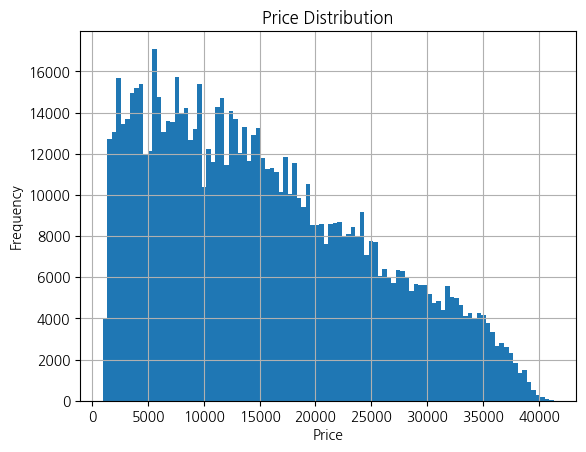

In [38]:
df_raw2['Price'].hist(bins=100)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

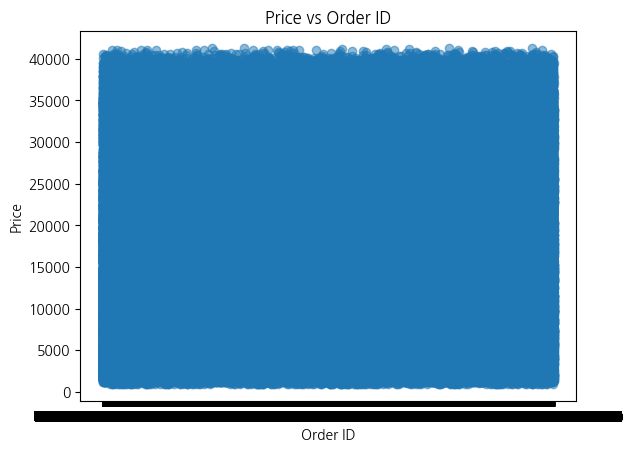

In [39]:
plt.scatter(df_raw2['idOrder'], df_raw2['Price'], alpha=0.5)
plt.title('Price vs Order ID')
plt.xlabel('Order ID')
plt.ylabel('Price')
plt.show()

In [61]:
df_raw2.groupby(['idUser','OrderDT'])[['Price']>40000]
    

TypeError: '>' not supported between instances of 'list' and 'int'

In [53]:
# 가격이 1000 미만인 주문을 필터링한 후, idUser와 OrderDT별로 그룹화
filtered_df = df_raw2[df_raw2['Price'] < 1000]

# 이제 그룹화 후 가격의 합계나 평균 등을 구할 수 있습니다. 예시로 가격의 합계를 구해보겠습니다.
grouped = filtered_df.groupby(['idUser', 'OrderDT'])['Price'].sum()

# # 결과 출력
# print(min(grouped))
grouped.value_counts()

970    64
980    43
960    39
990    12
Name: Price, dtype: int64

In [60]:
df_check=df_raw2[df_raw2['Price']==960]

df_check=map_item_codes_to_names(df_check['ItemCode'])
print(df_check)

['하루채소 깻잎']


In [64]:
df_raw2['Price'].max()

41310

In [57]:
def map_item_codes_to_names(item_codes):
    # df_items와 병합해서 ItemCode에 대응하는 ItemName을 가져오기
    return df_raw1[df_raw1['ItemCode'].isin(item_codes)]['ItemName'].tolist()



In [30]:
df_raw1[df_raw1['ItemCode']=="L1-M11-S0220-1030"]

,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
303,L1,가공식품,M11,곡물,S0220,라면,L1-M11-S0220-1030,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,2023,16660,17860
304,L1,가공식품,M11,곡물,S0220,라면,L1-M11-S0220-1030,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,2021,15340,16290
305,L1,가공식품,M11,곡물,S0220,라면,L1-M11-S0220-1030,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,2022,15490,16790
354,L1,가공식품,M11,곡물,S0220,라면,L1-M11-S0220-1030,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,2023,19310,20710
355,L1,가공식품,M11,곡물,S0220,라면,L1-M11-S0220-1030,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,2022,17770,19670


In [28]:
df_raw2[df_raw2['DeliveryDT']== "11DEC2023:05:37:00"]

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
77770,U10273,U10273-O2023-1006,08DEC23:23:45:05,L1-M24-S0600-1135,22270,11DEC2023:05:37:00
77771,U10273,U10273-O2023-1006,08DEC23:23:45:05,L1-M11-S0220-1084,21140,11DEC2023:05:37:00
77772,U10273,U10273-O2023-1006,08DEC23:23:45:05,L4-M12-S0640-1009,36520,11DEC2023:05:37:00
77773,U10273,U10273-O2023-1006,08DEC23:23:45:05,L1-M12-S0330-1014,17570,11DEC2023:05:37:00
77774,U10273,U10273-O2023-1006,08DEC23:23:45:05,L4-M12-S0430-1001,18140,11DEC2023:05:37:00
...,...,...,...,...,...,...
817006,U12863,U12863-O2023-1003,08DEC23:21:31:06,L4-M22-S0020-1079,13040,11DEC2023:05:37:00
817007,U12863,U12863-O2023-1003,08DEC23:21:31:06,L4-M12-S0640-1047,19010,11DEC2023:05:37:00
817008,U12863,U12863-O2023-1003,08DEC23:21:31:06,L4-M12-S0620-1033,19490,11DEC2023:05:37:00
817009,U12863,U12863-O2023-1003,08DEC23:21:31:06,L1-M15-S0140-1243,19330,11DEC2023:05:37:00


In [16]:
df_raw3=pd.read_csv("./on_users.csv", encoding="cp949")
df_raw3

,idUser,Gender,Age,FamilyCount,MemberYN
0,U10001,여성,26,2,Y
1,U10002,남성,61,2,Y
2,U10003,여성,34,2,Y
3,U10004,남성,26,1,N
4,U10005,여성,33,3,Y
...,...,...,...,...,...
2995,U12996,여성,66,2,N
2996,U12997,남성,24,2,Y
2997,U12998,남성,31,2,Y
2998,U12999,여성,32,1,Y


In [21]:
df_raw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idUser       3000 non-null   object
 1   Gender       3000 non-null   object
 2   Age          3000 non-null   int64 
 3   FamilyCount  3000 non-null   int64 
 4   MemberYN     3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [22]:
df_raw3.isnull().sum()

idUser         0
Gender         0
Age            0
FamilyCount    0
MemberYN       0
dtype: int64

In [23]:
for i in df_raw3.columns:
    print(df_raw3[i].value_counts())

U10001    1
U12004    1
U11995    1
U11996    1
U11997    1
         ..
U11003    1
U11004    1
U11005    1
U11006    1
U13000    1
Name: idUser, Length: 3000, dtype: int64
여성    1810
남성    1190
Name: Gender, dtype: int64
34    148
38    145
33    134
35    131
37    128
30    128
36    123
31    117
32    116
39    110
24    107
26    106
22    100
28     99
23     97
29     91
27     85
25     83
44     52
21     52
49     50
45     50
43     49
47     49
40     47
42     46
46     46
41     45
48     43
52     36
50     35
56     33
53     32
57     31
51     28
55     26
58     24
59     23
54     23
60     18
68     17
67     17
64     15
69     14
63     14
61     12
66     11
62      7
65      7
Name: Age, dtype: int64
2    1134
1     803
3     599
0     464
Name: FamilyCount, dtype: int64
Y    2155
N     845
Name: MemberYN, dtype: int64
